The goal of multi-class classification is to assign an instance to one of the set of classes. scikit-learn uses a strategy called one-vs.-all, or one-vs.the-rest, to support multi-class classi cation.

In [1]:
import pandas as pd

In [4]:
test_df = pd.read_csv('./data/movie/test.tsv', delimiter='\t')
train_df = pd.read_csv('./data/movie/train.tsv', delimiter='\t')

In [5]:
test_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [10]:
'''
The Sentiment column contains the response variables. The 0 label corresponds to the sentiment negative, 1 corresponds to somewhat negative, and so on. 
The Phrase column contains the raw text. Each sentence from the movie reviews has been parsed into smaller phrases.
We will not require the PhraseId and SentenceId columns in this example. 
'''
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [23]:
train_df.Sentiment.value_counts() / train_df.Sentiment.count()

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

### The most common class, Neutral, includes more than 50 percent of the instances. Accuracy will not be an informative performance measure for this problem, as a degenerate classi er that predicts only Neutral can obtain an accuracy near 0.5.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

In [27]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression()),
])

parameters = {
    'vect__max_df': (0.25, 0.5),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'clf__C': (0.1, 1, 10),
}

In [28]:
X, y = train_df.Phrase, train_df.Sentiment.as_matrix()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [32]:
grid_search = GridSearchCV(pipeline, parameters, verbose=1, scoring='accuracy')

In [33]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  3.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('vect', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'vect__ngram_range': ((1, 1), (1, 2)), 'vect__use_idf': (True, False), 'clf__C': (0.1, 1, 10), 'vect__max_df': (0.25, 0.5)},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [35]:
print 'Best score: %0.3f' % grid_search.best_score_
print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

Best score: 0.622
Best parameters set:
	clf__C: 10
	vect__max_df: 0.25
	vect__ngram_range: (1, 2)
	vect__use_idf: False


# Multi-class classification performance metrics

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
predictions = grid_search.predict(X_test)
print 'Accuracy:', accuracy_score(y_test, predictions)

Accuracy: 0.635089068307


In [46]:
import seaborn as sns
%matplotlib inline

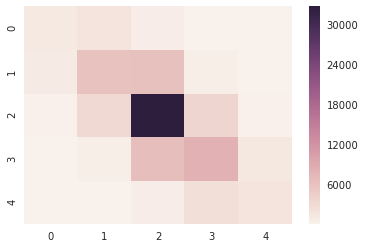

In [47]:
confusion_mat = confusion_matrix(y_test, predictions)
sns.heatmap(confusion_mat)

In [41]:
print 'Classification Report:', classification_report(y_test, predictions)

Classification Report:              precision    recall  f1-score   support

          0       0.49      0.32      0.39      3528
          1       0.53      0.44      0.48     13575
          2       0.70      0.82      0.76     39867
          3       0.55      0.49      0.52     16453
          4       0.52      0.36      0.43      4607

avg / total       0.62      0.64      0.62     78030

